In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


Loading Dataset

In [31]:
df = pd.read_csv('cars_ds_final.csv',encoding='unicode_escape')
df.head(5)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.shape

(1276, 141)

In [33]:
# We will consider few columns from the dataset

df = df[['Make','Model','Variant','Ex-Showroom_Price','Displacement','Emission_Norm','Fuel_System','Fuel_Tank_Capacity','Fuel_Type','City_Mileage','Highway_Mileage']]
df.head(5)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Emission_Norm,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,City_Mileage,Highway_Mileage
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,BS IV,Injection,24 litres,Petrol,23.6 km/litre,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,BS IV,Injection,24 litres,Petrol,23.6 km/litre,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,BS IV,Injection,15 litres,CNG,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,BS IV,Injection,24 litres,Petrol,23.6 km/litre,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,BS IV,Injection,24 litres,Petrol,23.6 km/litre,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                1201 non-null   object
 1   Model               1276 non-null   object
 2   Variant             1276 non-null   object
 3   Ex-Showroom_Price   1276 non-null   object
 4   Displacement        1264 non-null   object
 5   Emission_Norm       1265 non-null   object
 6   Fuel_System         1268 non-null   object
 7   Fuel_Tank_Capacity  1207 non-null   object
 8   Fuel_Type           1276 non-null   object
 9   City_Mileage        721 non-null    object
 10  Highway_Mileage     476 non-null    object
dtypes: object(11)
memory usage: 109.8+ KB


In [35]:
print(df.columns)

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Emission_Norm', 'Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type',
       'City_Mileage', 'Highway_Mileage'],
      dtype='object')


In [36]:
#Remove units of each value in the columns

df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','')
df['Displacement'] = df['Displacement'].str.replace(' cc','')
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace('litres','')
df['City_Mileage'] = df['City_Mileage'].str.replace('km/litre','')
df['Highway_Mileage'] = df['Highway_Mileage'].str.replace('km/litre','')


# Rename the Columns and give unit in the column_name

df.rename(columns={'Ex-Showroom_Price':'Ex-Showroom_Price(Rs)',
           'Displacement':'Displacement(cc)',
           'Fuel_Tank_Capacity':'Fuel_Tank_Capacity(litres)',
           'City_Mileage':'City_Mileage(km/litre)',
           'Highway_Mileage':'Highway_Mileage(km/litre)'
           },inplace=True)



df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price(Rs)', 'Displacement(cc)',
       'Emission_Norm', 'Fuel_System', 'Fuel_Tank_Capacity(litres)',
       'Fuel_Type', 'City_Mileage(km/litre)', 'Highway_Mileage(km/litre)'],
      dtype='object')

In [37]:
# Change Data type of the Columns

df['Ex-Showroom_Price(Rs)'] = df['Ex-Showroom_Price(Rs)'].str.replace(',','').astype('int')
df['Displacement(cc)'] = df['Displacement(cc)'].astype('float')
df['Fuel_Tank_Capacity(litres)'] = df['Fuel_Tank_Capacity(litres)'].astype('float')
df['City_Mileage(km/litre)'] = df['City_Mileage(km/litre)'].astype('float')
df['Highway_Mileage(km/litre)'] = df['Highway_Mileage(km/litre)'].astype('float')

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        1201 non-null   object 
 1   Model                       1276 non-null   object 
 2   Variant                     1276 non-null   object 
 3   Ex-Showroom_Price(Rs)       1276 non-null   int32  
 4   Displacement(cc)            1264 non-null   float64
 5   Emission_Norm               1265 non-null   object 
 6   Fuel_System                 1268 non-null   object 
 7   Fuel_Tank_Capacity(litres)  1207 non-null   float64
 8   Fuel_Type                   1276 non-null   object 
 9   City_Mileage(km/litre)      721 non-null    float64
 10  Highway_Mileage(km/litre)   476 non-null    float64
dtypes: float64(4), int32(1), object(6)
memory usage: 104.8+ KB


In [39]:
df.describe()

,Ex-Showroom_Price(Rs),Displacement(cc),Fuel_Tank_Capacity(litres),City_Mileage(km/litre),Highway_Mileage(km/litre)
count,1.276000e+03,1264.000000,1207.000000,721.000000,476.000000
mean,4.596538e+06,1858.804589,52.119221,51.884286,16.883256
std,1.214735e+07,1063.152389,16.458956,968.935186,4.920693
min,2.364470e+05,72.000000,15.000000,2.000000,4.000000
25%,7.438760e+05,1198.000000,40.000000,11.500000,13.800000
50%,1.060064e+06,1497.000000,46.000000,15.290000,17.190000
75%,2.979828e+06,1998.000000,60.000000,19.200000,20.500000
max,2.121554e+08,7993.000000,105.000000,26032.000000,25.600000


Cleaning Dataset

In [40]:
# drop first column (unnamed)

# df.drop(df.columns[0],axis=1,inplace=True)
# df.head(5)

In [41]:
# Check number of Nulls in each column

print(f"Shape = {df.shape}")

pd.isnull(df).sum()



Shape = (1276, 11)


Make                           75
Model                           0
Variant                         0
Ex-Showroom_Price(Rs)           0
Displacement(cc)               12
Emission_Norm                  11
Fuel_System                     8
Fuel_Tank_Capacity(litres)     69
Fuel_Type                       0
City_Mileage(km/litre)        555
Highway_Mileage(km/litre)     800
dtype: int64

In [42]:
# Handle Nulls in Make Column

df['Make'].fillna(df['Model'],inplace=True)


In [43]:
# Handle Nulls in Displacement Column / delete all rows where Displacement is NULL

df.dropna(subset=['Displacement(cc)'],inplace=True)


In [44]:
# Handle Nulls in Emission_Norm Column / delete all rows where Emission_Norm is NULL

df.dropna(subset=['Emission_Norm'],inplace=True)

c:\Users\AkshaySanas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


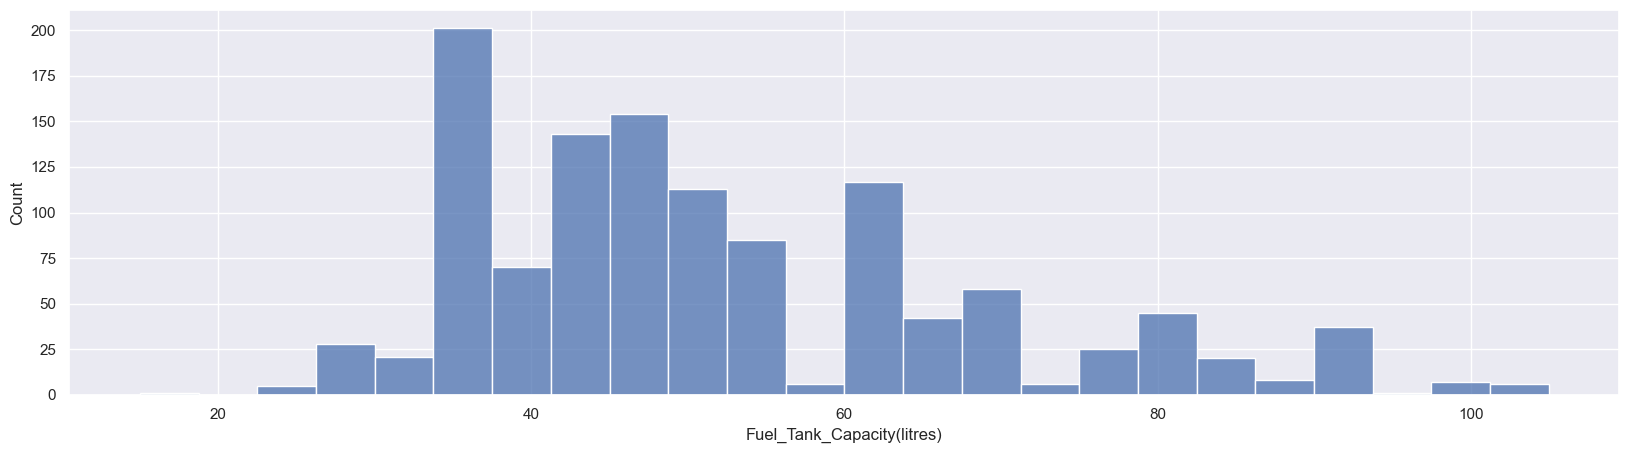

In [45]:
# Handle Nulls in Fuel_Tank_Capacity(litres) Column 

sns.histplot(df['Fuel_Tank_Capacity(litres)'])
plt.show()

# Replace NULLs with mean value

df['Fuel_Tank_Capacity(litres)'].fillna(df['Fuel_Tank_Capacity(litres)'].mean(),inplace=True)

In [46]:
# Handle Nulls in City_Mileage(km/litre) Column 


# Replace NULLs with mode value

df['City_Mileage(km/litre)'].fillna(df['City_Mileage(km/litre)'].mode()[0],inplace=True)


In [47]:
# Handle Nulls in Highway_Mileage(km/litre) Column 

# sns.histplot(df['Highway_Mileage(km/litre)'])
# plt.show()

# Replace NULLs with mode value

df['Highway_Mileage(km/litre)'].fillna(df['Highway_Mileage(km/litre)'].mode()[0],inplace=True)

In [48]:
pd.isnull(df).sum()

Make                          0
Model                         0
Variant                       0
Ex-Showroom_Price(Rs)         0
Displacement(cc)              0
Emission_Norm                 0
Fuel_System                   0
Fuel_Tank_Capacity(litres)    0
Fuel_Type                     0
City_Mileage(km/litre)        0
Highway_Mileage(km/litre)     0
dtype: int64

In [49]:
df.shape

(1254, 11)

Exploratory Data Analysis (EDA)

Make & Model

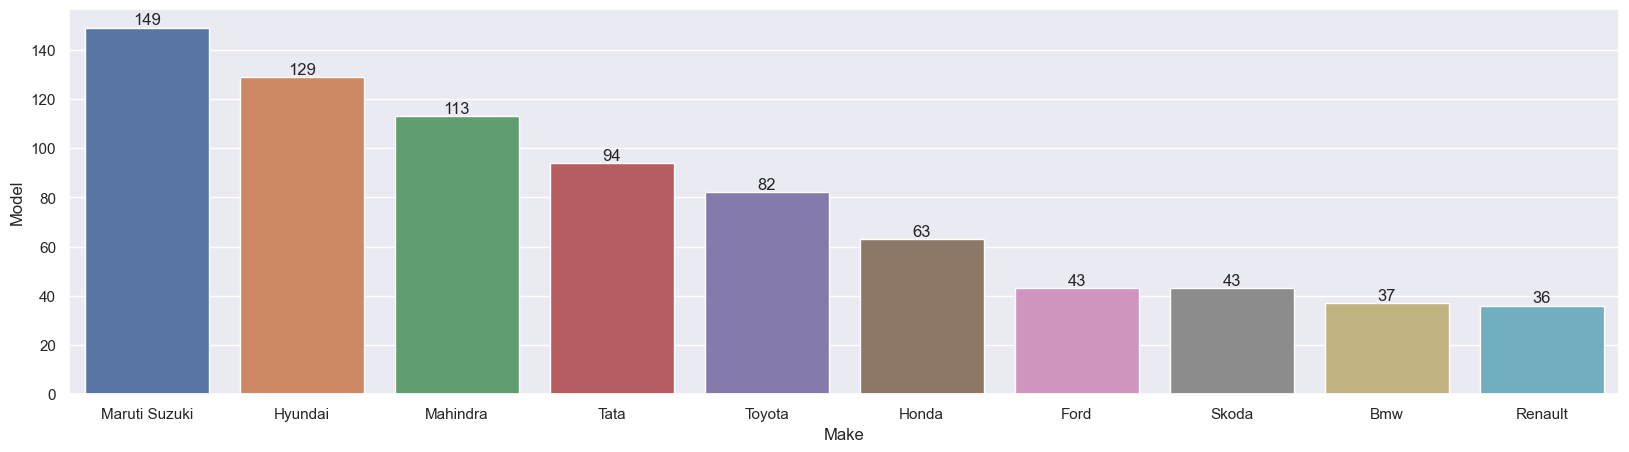

In [50]:
# Get which company has launched more number of car models

Top_10_Make = df.groupby('Make',as_index=False)['Model'].count().sort_values(by='Model',ascending=False).head(10)

# print(Top_10_Make)

sns.set(rc={'figure.figsize':(20,5)})

ax = sns.barplot(x='Make',y='Model',data=Top_10_Make)

for bars in ax.containers:
    ax.bar_label(bars)

Here We can See that most of the Car Models are Launched by "Maruti Suzuki","Hyundai"and "Mahindra" Respectively

Variant

              Make          Model  Variant
221           Tata          Nexon       24
117       Mahindra     Kuv100 Nxt       22
91            Jeep        Compass       21
127       Mahindra         Xuv500       21
62           Honda          Amaze       20
70         Hyundai          Creta       18
96             Kia         Seltos       16
234         Toyota  Innova Crysta       16
138  Maruti Suzuki          Dzire       14
137  Maruti Suzuki           Ciaz       14


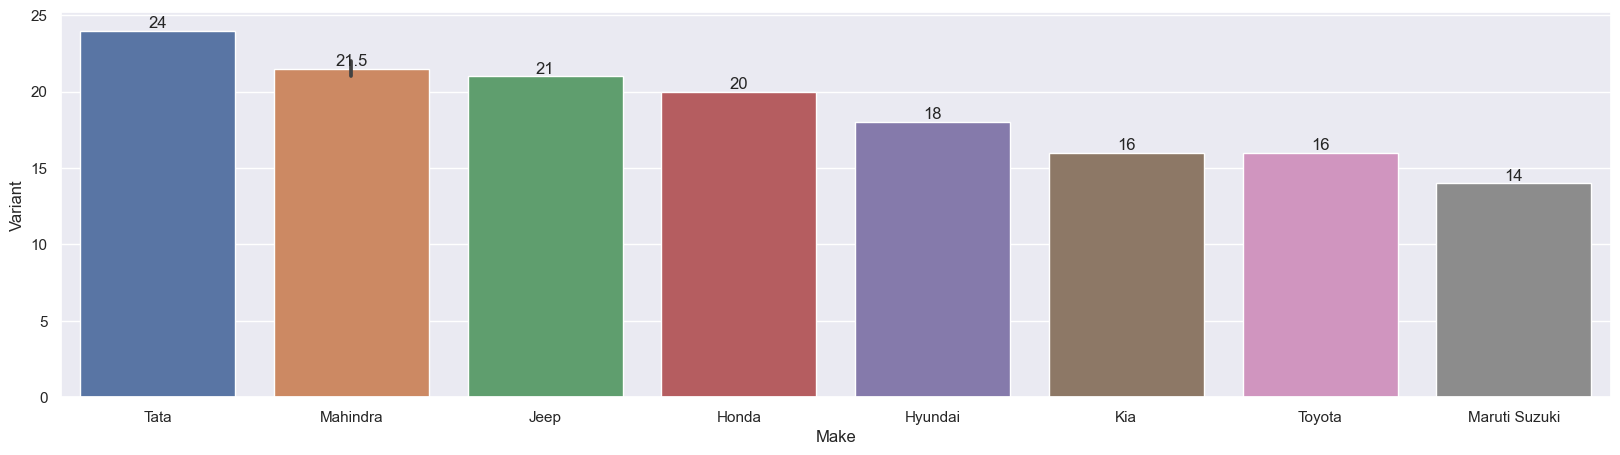

In [51]:
# Find Which Model has most variants

Top_10_Variants = df.groupby(['Make','Model'],as_index=False)['Variant'].count().sort_values(by='Variant',ascending=False).head(10)

print(Top_10_Variants)

ax = sns.barplot(x='Make',y='Variant',data=Top_10_Variants)

for bars in ax.containers:
    ax.bar_label(bars)


From the above Graphs we can see that though Maruti Suzuki has more Number of Models but Most of the Model Variants are of Tata, Mahindra & Jeep Respectively

Ex-Showroom_Price(Rs)

In [52]:
# Number of Cars in Differnt Price Range

print(min(df['Ex-Showroom_Price(Rs)']))
print(max(df['Ex-Showroom_Price(Rs)']))

236447
212155397


In [53]:
bins = [0,1000000,2000000,4000000,6000000,float('inf')]
lables = ['Below 1000000','1000000 - 2000000','2000000 - 4000000','4000000 - 6000000','Above 6000000']

df['Price_Range'] = pd.cut(df['Ex-Showroom_Price(Rs)'],labels=lables,bins=bins)


c:\Users\AkshaySanas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


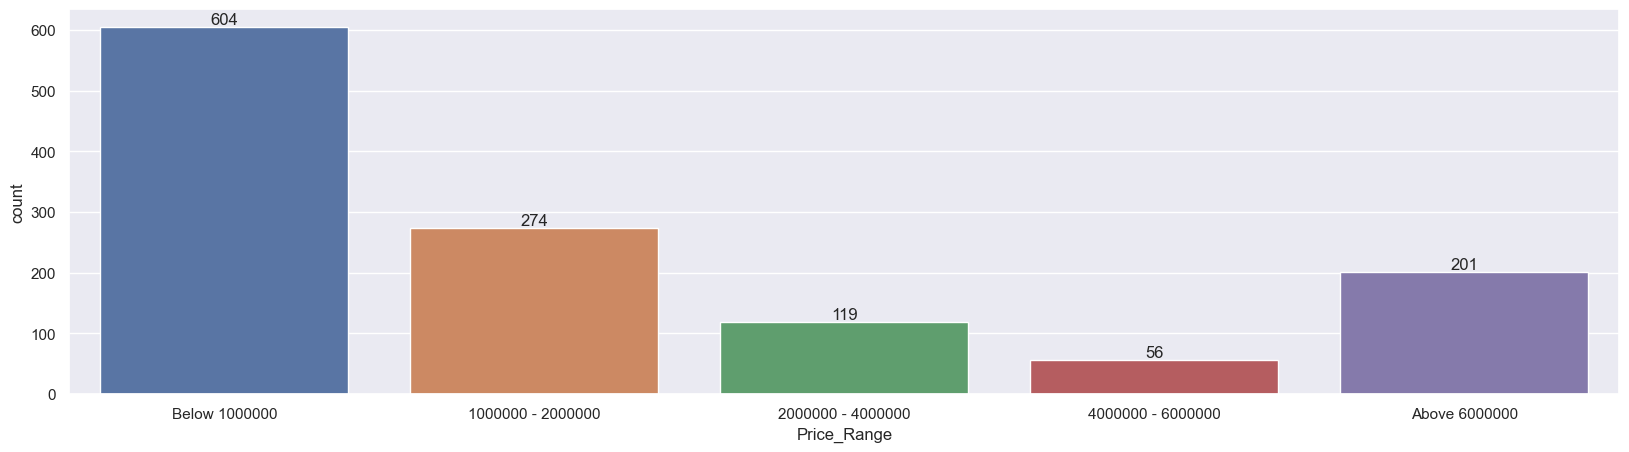

In [54]:
ax = sns.countplot(x='Price_Range',data=df)

for bars in ax.containers:
    ax.bar_label(bars)


Here we can see Most of the cars Price lie below 10 lakhs

In [66]:
# show how columns are related to each other

df1 = df[['Ex-Showroom_Price(Rs)','Displacement(cc)','Fuel_Tank_Capacity(litres)','City_Mileage(km/litre)','Highway_Mileage(km/litre)']]

corr_Tab = df1.corr()
corr_Tab



,Ex-Showroom_Price(Rs),Displacement(cc),Fuel_Tank_Capacity(litres),City_Mileage(km/litre),Highway_Mileage(km/litre)
Ex-Showroom_Price(Rs),1.000000,0.795395,0.469287,-0.010079,-0.265443
Displacement(cc),0.795395,1.000000,0.754938,-0.012377,-0.433914
Fuel_Tank_Capacity(litres),0.469287,0.754938,1.000000,-0.018922,-0.425639
City_Mileage(km/litre),-0.010079,-0.012377,-0.018922,1.000000,0.016921
Highway_Mileage(km/litre),-0.265443,-0.433914,-0.425639,0.016921,1.000000


c:\Users\AkshaySanas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AkshaySanas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AkshaySanas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AkshaySanas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcor

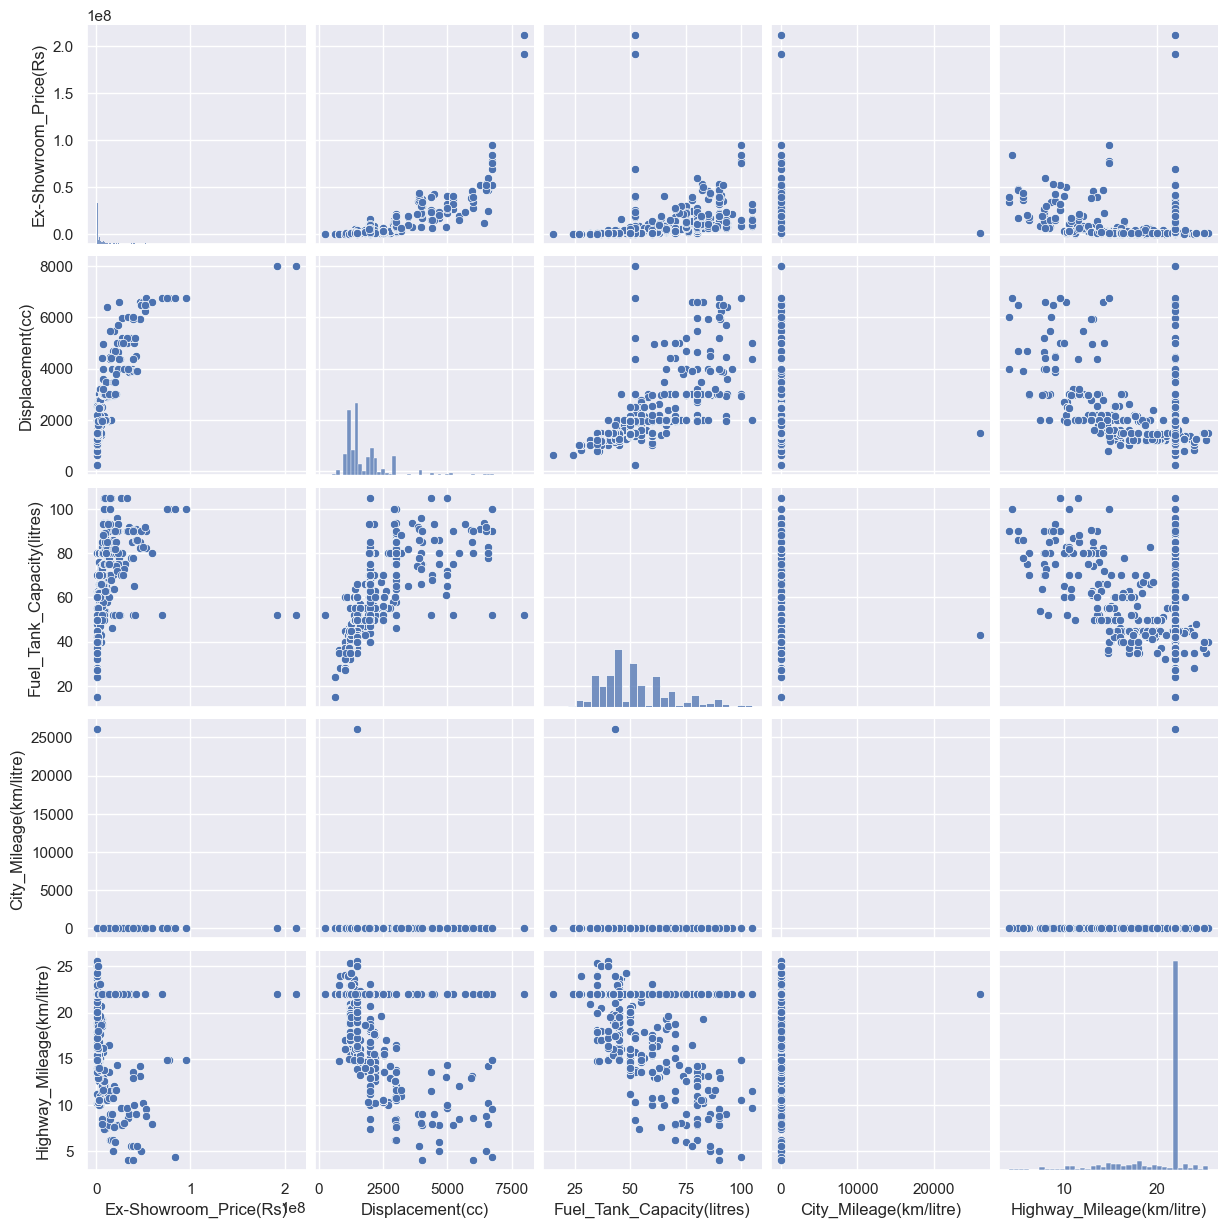

In [76]:
sns.pairplot(df1)

Fuel Type

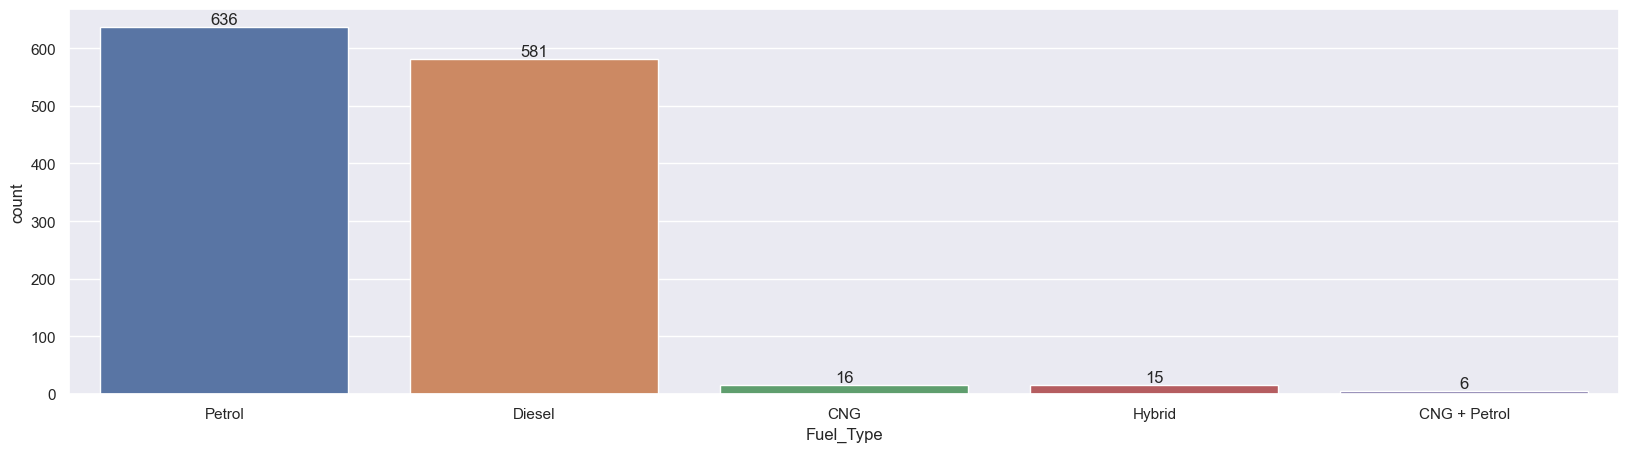

In [80]:
# df.groupby('Fuel_Type')['']

ax = sns.countplot(data=df,x='Fuel_Type',order=df['Fuel_Type'].value_counts().index)

for bars in ax.containers:
    ax.bar_label(bars)

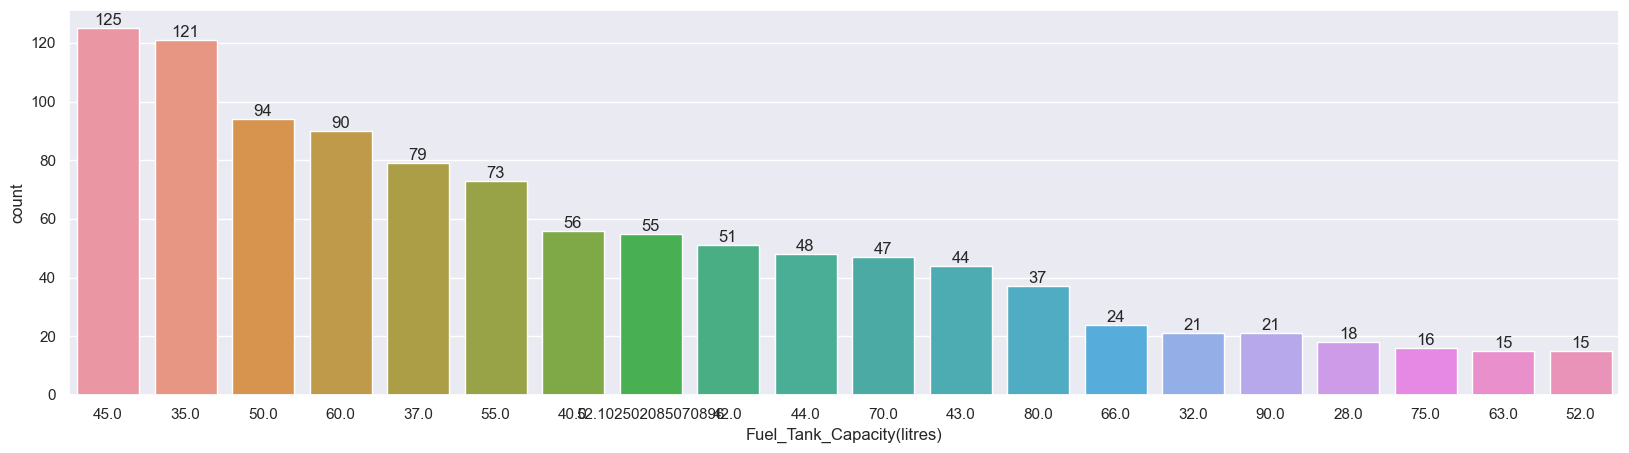

In [90]:
ax = sns.countplot(data=df,x='Fuel_Tank_Capacity(litres)',order=df['Fuel_Tank_Capacity(litres)'].value_counts().head(20).index)

for bars in ax.containers:
    ax.bar_label(bars)

Conclusion :

Most of the cars are of Price below 1000000 with Petrol Engine and Diesel Engine with 45 Litres of Fuel_Tank_Capacity